<img src="../static/aeropython_name_mini.png" alt="AeroPython" style="width: 300px;"/>

# Transverse Vibration of a uniform Euler-Bernoilli beam.

##### by [Shaker Bayajid Khan](https://es.linkedin.com/in/shakerbayajid) 

 Let us consider a uniform Euler-Bernoulli beam of length $L$.  Transverse Vibrations of the bean are given by the following Partial Differential Equation of motion:


$\cfrac{\partial^{2}u(x,t)}{\partial t^2}+c^2\cfrac{\partial^{4}u(x,t)}{\partial t^4}= 0;\\ \mathrm{where}\,\,\,\,\,  \, c^2 = \cfrac {EI}{\rho A}; \, \mathrm{and} \,\,\,\,\,\, \omega_n = c\beta_n^2 = \beta_n^2 \sqrt{\cfrac {EI}{\rho A}} $

Where the general solution is given by the following equation from which the natural frequencies may be found:



$F(x) = A cos(\beta x)+B sin(\beta x)+C cosh(\beta x)+ D sinh(\beta x)$

The function $F(x)$ is known as the normal mode or characteristic function of the beam and $\omega$ is called the natural frequency of vibration. For a beam, there will be an infinite number of normal modes with one natural frequenc  associated with each normal mode. The unknown constants $A$ to $D$ in the previous equation and the value of $\beta$ can be determined from the boundary conditions of the beam as indicated below.

Boundary Condition| Frequency equation | Mode Shape                                                  |
  -------------   | -------------------| ------------------------------------------------------------|
  Free-Free  | cos $\beta_n L$cosh$(\beta_n L) = 1$| $P_n(x)$$-\cfrac{Q_n(L)}{S_n(L)}$$R_n(x)$ 
  Fixed-Free  |cos $\beta_n L$cosh$(\beta_n L) = -1$ |$Q_n(x)$ $-\cfrac {S_n(L)}{P_n(L)}$$ S_n(x)$ 
  Fixed-Pinned|tan $\beta_n L-$ tanh$\beta_n L = 0$ |$Q_n(x)$$-\cfrac {Q_n(L)}{S_n(L)}$$ S_n(x)$ 
  Fixed-Fixed |cos $\beta_n L$cosh$(\beta_n L) = 1$ |$Q_n(x)$$-\cfrac {Q_n(L)}{S_n(L)}$$ S_n(x)$ 
  Pinned-Pinned |sin$\beta_n L = 0$ | sin $\cfrac{n\pi x}{L}$

where $(\beta_nL)^2$ are the spatial frequencies

and we also have,
$$P_n(x) = cosh\beta_nx + cos\beta_nx $$
$$Q_n(x) = cosh\beta_nx - cos\beta_nx $$
$$R_n(x) = sinh\beta_nx + sin\beta_nx $$
$$S_n(x) = sinh\beta_nx - sin\beta_nx $$

## Initialization

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve
%matplotlib inline

## Input 

Here as input, we will take values of Length L (in $m$), radius  R (in $m$) of the beam and material properties: Youngs modulus E (in $Pa$) and density $\rho$ (in $kg/m^3$).

In [2]:
print("Consider a beam with circular cross section. Enter parameters,")
L = float(input('Enter Length (L) in [m]=  ')) # insert 1 (i.e.)
R = float(input('Enter Radius (r) in [m], [r << L]= '))  # insert 0.02 (i.e.)
Ix = (1/4)*np.pi*R**4
A = np.pi*R**2
# input('Enter Young"s modulus in [Pa]=  ') 
E = float(input("Enter Young's modulus in [GPa],[i.e. Al~70]=  "))*1e9  # e.g. 70e9 Pa
# insert 70e9 Pa i.e. for aluminium
Rho = 27e3  #aluminium

Consider a beam with circular cross section. Enter parameters,
Enter Length (L) in [m]=  1
Enter Radius (r) in [m], [r << L]= 0.02
Enter Young's modulus in [GPa],[i.e. Al~70]=  70e9


Initial values of $\beta_n L$ are:

In [3]:
a0 = np.array([4.7, 7.2, 10.8, 14])   # for boundarie condition Free-Free & Fixed-Fixed
z0 = np.array([1.8, 4.7, 7.2, 10.8])  # for boundarie condition Fixed-Free
u0 = np.array([3.7, 6, 10, 13])       # for Bc Fixed-Pinned
p0 = np.array([3, 6.2, 9.3, 12.5])    # for Pinned-Pinned

In [4]:
def a(x):
    return np.cos(x)*np.cosh(x)-1
def z(x):
    return np.cos(x)*np.cosh(x)+1
def u(x):
    return np.tan(x)-np.tanh(x)
def p(x):
    return np.sin(x)

an = np.zeros_like(a0)
zn = np.zeros_like(a0)
un = np.zeros_like(a0)
pn = np.zeros_like(a0) 

for i in range(len(a0)): 
# fsolve to obtain the spatial frecuencies
    an[i] = fsolve(a, a0[i])  # FeFe & FiFi
    zn[i] = fsolve(z, z0[i])  # FiFe
    un[i] = fsolve(u, u0[i])  # FiPi
    pn[i] = fsolve(p, p0[i])  # PiPi

# coeficients Qn(L)/Sn(L) and Sn(L)/Pn(L) theres no need for coeficients
# for PiPi boundary condition

F = (np.cosh(an)- np.cos(an))/(np.sinh(an)-np.sin(an))  # Qn(L)/Sn(L) for FeFe and FiFi
K = (np.sinh(zn)- np.sin(zn))/(np.cosh(zn)-np.cos(zn))  # Sn(L)/Pn(L) for FiFe
Q = (np.cosh(un)- np.cos(un))/(np.sinh(un)-np.sin(un))  # Qn(L)/Sn(L) for FiPi        
    
# dividing the spatial frecuencies by L to get de Bn value for each b.c.

an = an/L #FeFe & FiFi
zn = zn/L #FiFe
un = un/L #FiPi
pn = pn/L #PiPi

'''
 Naturel frecuencies Wn=2*pi*fn fn=nat.frecuency
 fn=Wn/(2*pi)=(Bn^2*(SQRT((E*I)/(Ro*A)))/2*pi
'''

fna = (an**2*np.sqrt((E*Ix)/(Rho*A)))/(2*np.pi) # FeFe & FiFi
fnz = (zn**2*np.sqrt((E*Ix)/(Rho*A)))/(2*np.pi) # FiFe
fnu = (un**2*np.sqrt((E*Ix)/(Rho*A)))/(2*np.pi) # FiPi
fnp = (pn**2*np.sqrt((E*Ix)/(Rho*A)))/(2*np.pi) # PiPi

In [5]:
N = int(input('Choose number of nodes along the beam = '))
x = np.linspace(0, L, N)
xl =  x/L

shape = (4, len(x))
Xnx0 = np.zeros(shape)# FeFe with 4 rows for each of the first spatial frecuencies and all the columns needed to cover al the linspace of "x"
Xnx1 = np.zeros(shape)# FiFe
Xnx2 = np.zeros(shape)# FiPi
Xnx3 = np.zeros(shape)# FiFi
Xnx4 = np.zeros(shape)# PiPi

for ii in range(4):
    Xnx0[ii,:] = np.cosh(an[ii]*x)+np.cos(an[ii]*x)-F[ii]*(np.sinh(an[ii]*x)+np.sin(an[ii]*x))
    Xnx1[ii,:] = np.cosh(zn[ii]*x)-np.cos(zn[ii]*x)-K[ii]*(np.sinh(zn[ii]*x)-np.sin(zn[ii]*x))
    Xnx2[ii,:] = np.cosh(un[ii]*x)-np.cos(un[ii]*x)-Q[ii]*(np.sinh(un[ii]*x)-np.sin(un[ii]*x))
    Xnx3[ii,:] = np.cosh(an[ii]*x)-np.cos(an[ii]*x)-F[ii]*(np.sinh(an[ii]*x)-np.sin(an[ii]*x))
    Xnx4[ii,:] = np.sin(pn[ii]*x)       

Choose number of nodes along the beam = 50


In [6]:
##    Natural Frequency, W can get User Input
##    in that case comment 'W = 34' and uncomment the next line to get user input.
##    W = float(input('Enter W (Natural Frequency) in [per second]=  '))

W = 34 
Bt = np.sqrt(W/(2*np.pi*L*np.sqrt((E*Ix)/(Rho*A))))
t = np.linspace(0, L, N)
tl = t/L

Ft = (np.cosh(Bt*(L**2))-np.cos(Bt*(L**2)))/(np.sinh(Bt*(L**2))-np.sin(Bt*(L**2)))    # Qn(L)/Sn(L) for FeFe and FiFi
Kt = (np.sinh(Bt*(L**2))-np.sin(Bt*(L**2)))/(np.cosh(Bt*(L**2))-np.cos(Bt*(L**2)))    # Sn(L)/Pn(L) for FiFe
Qt = (np.cosh(Bt*(L**2))-np.cos(Bt*(L**2)))/(np.sinh(Bt*(L**2))-np.sin(Bt*(L**2)))    # Qn(L)/Sn(L) for FiPi

ss = (1,len(x))
Xx0 = np.zeros_like(x)
Xx1 = np.zeros_like(x)
Xx2 = np.zeros_like(x)
Xx3 = np.zeros_like(x)
Xx4 = np.zeros_like(x)

for j in range(len(x)):
    Xx0[j]= np.cosh(Bt*x[j])+np.cos(Bt*x[j])-Ft*(np.sinh(Bt*x[j])+np.sin(Bt*x[j]))      # FeFe
    Xx1[j]= np.cosh(Bt*x[j])-np.cos(Bt*x[j])-Kt*(np.sinh(Bt*x[j])-np.sin(Bt*x[j]))      # FiFe
    Xx2[j] = np.cosh(Bt*x[j])-np.cos(Bt*x[j])-Qt*(np.sinh(Bt*x[j])-np.sin(Bt*x[j]))     # FiPi
    Xx3[j] = np.cosh(Bt*x[j])-np.cos(Bt*x[j])-Ft*(np.sinh(Bt*x[j])-np.sin(Bt*x[j]))     # FiFi
    Xx4[j] = np.sin(Bt*x[j])                                                            # PiPi
        
Tt1 = np.zeros(len(t))
Tt1 = np.vstack(np.cos(W*t))

Mv0=Tt1*Xx0
Mv1=Tt1*Xx1
Mv2=Tt1*Xx2
Mv3=Tt1*Xx3
Mv4=Tt1*Xx4

### Plotting

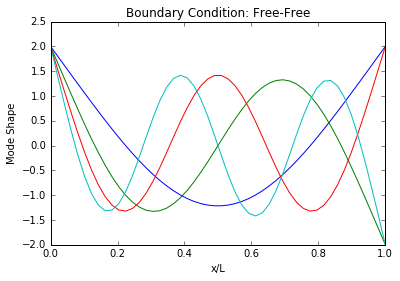

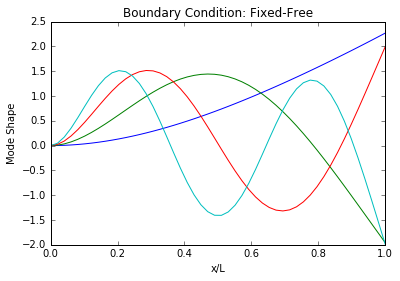

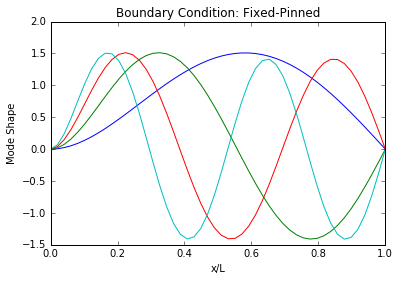

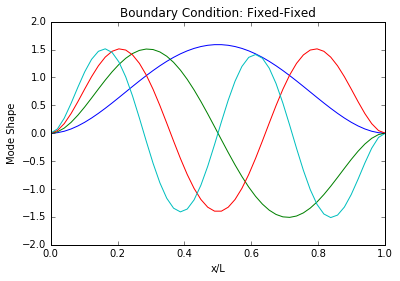

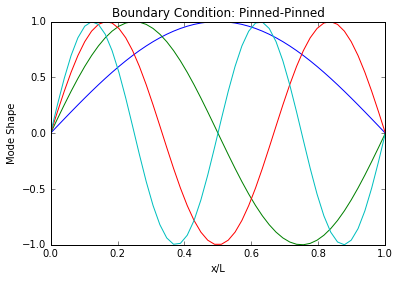

In [7]:
modes = [Xnx0,Xnx1,Xnx2,Xnx3,Xnx4]
titles =['Free-Free','Fixed-Free','Fixed-Pinned','Fixed-Fixed','Pinned-Pinned']
for j in range (len(modes)):
    temp = modes[j]
    figure = plt.figure() 
    for ii in range(4):
        plt.plot(xl,temp[ii,:])
        plt.xlabel('x/L')
        plt.ylabel('Mode Shape')
        plt.title("Boundary Condition: %s" %titles[j]) 
    

## Interactive Plotting
This is for creating interactive plotting for the same thing shown above. The user can select the modeshape and boundary conditions in this case.

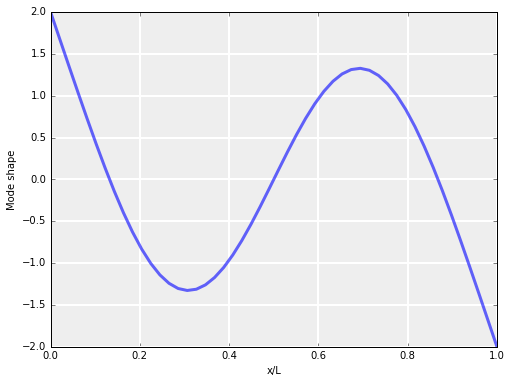

In [8]:
###########################################################################
# Interactive plotting for different mode shapes
# and different Boundary Conditions.
#
###########################################################################
from ipywidgets import interact, IntSlider, RadioButtons
mode_slider = IntSlider(min=0, max=3, step=1, value=1)
bc_buttons = RadioButtons(options=['Free-Free', 'Fixed-Free', 'Fixed-Pinned','Fixed-Fixed','Pinned-Pinned'])
#animation = IntSlider(min=0, max = 180, step=1,value=1)

###########################################################################

plt.close()
@interact(Mode=mode_slider, Boundary_Condition=bc_buttons)#, Anim=animation)
def plot(Mode, Boundary_Condition):
    fig, ax = plt.subplots(figsize=(8, 6),
                       subplot_kw={'axisbg':'#EEEEEE',
                                   'axisbelow':True})
    if (Boundary_Condition == 'Free-Free'):
        PP = Xnx0
        P = Mv0
    elif (Boundary_Condition == 'Fixed-Free'):
        PP = Xnx1
        P = Mv1        
    elif (Boundary_Condition == 'Fixed-Pinned'):
        PP = Xnx2
        P = Mv2
    elif (Boundary_Condition == 'Fixed-Fixed'):
        PP = Xnx3
        P = Mv3
    elif (Boundary_Condition == 'Pinned-Pinned'):    
        PP = Xnx4
        P = Mv4
        
    ax.grid(color='w', linewidth=2, linestyle='solid')
    ax.plot(xl, PP[Mode,:],
        lw=3, alpha=0.6)
    plt.xlabel('x/L')
    plt.ylabel('Mode shape')    

## How about animate the beam ?
We can also animate the boundary condition in the following way:

In [9]:
#  Animate the beam
#  For this we need to use the inemagic %matplotlib qt to get the figure out of the browser.
#  User will be asked to select the boundary condition of the beam.

%matplotlib qt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

print('Boundary Conditions Selector:\n Free-Free:1\t Fixed-Free:2\t Fixed-Pinned:3\t Fixed-Fixed:4\t Pinned-Pinned:5 ')
temp = int(input('Enter value [number] =  '))

if (temp == 1):
    P = Mv0
elif (temp == 2):
    P = Mv1
elif (temp == 3):    
    P = Mv2
elif (temp == 4):
    P = Mv3
elif (temp == 5):
    P = Mv4
    
temp2 = ['Free-Free','Fixed-Free','Fixed-Pinned','Fixed-Fixed','Pinned-Pinned']
fig, ax1 = plt.subplots(1, 1, figsize=(8, 12), subplot_kw={'projection': '3d'})
ax1.set_xlabel('x/L')
ax1.set_title("Boundary Condition: %s" %temp2[temp-1]) 

for i in range(len(xl)):
    ax1.plot(xs=xl, ys=[0]*len(xl),c='r', zs=P[i,:], zdir='z', label='ys=0, zdir=z')
    ax1.set_zlim(np.min(P[i, :])*2, np.max(P[i, :])*2)
    plt.pause(0.2)
    plt.draw()   
    #plt.show()

Boundary Conditions Selector:
 Free-Free:1	 Fixed-Free:2	 Fixed-Pinned:3	 Fixed-Fixed:4	 Pinned-Pinned:5 
Enter value [number] =  4


/miniconda/lib/python3.5/site-packages/matplotlib/backend_bases.py:2437: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


Si te ha gustado esta contribución y quieres contárselo a tus amigos:

<a href="https://twitter.com/share" class="twitter-share-button" data-url="https://github.com/AeroPython/curso_caminos-2016/" data-text="Aprendiendo Python con" data-via="AeroPython" data-size="large" data-hashtags="AeroPython">Tweet</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

---

#### <h4 align="right">¡Síguenos en Twitter!

###### <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script> 

##### Este notebook ha sido realizado por [Shaker Bayajid Khan](https://es.linkedin.com/in/shakerbayajid) como contribución tras su participación como alumno en este curso.

##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

In [10]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../static/styles/style.css'
HTML(open(css_file, "r").read())